### Install and load the needed python modules

In [1]:
try:
    import psycopg2 
except:
    !pip install psycopg2-binary 
    import psycopg2
    
try:
    from sqlalchemy import create_engine
except:
    !pip install sqlalchemy
    from sqlalchemy import create_engine
    
    
try:
    import pandas as pd
    import time
    import matplotlib.pyplot as plt
except:
    !pip install pandas matplotlib
    import pandas as pd
    import time 
    import matplotlib.pyplot as plt
     

try:
    import sklearn 
except:
    !pip install sklearn
    import sklearn

### Load a single Day data for UK to check on the different states recorded

In [15]:
import pandas as pd 
Day='01-01-2022'
URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{Day}.csv'
DF_day=pd.read_csv(URL_Day)
DF_day['Day']=Day
cond=(DF_day.Country_Region=='United Kingdom')#&(DF_day.Province_State=='England')
Selec_columns=['Day','Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio','Province_State']
DF_i=DF_day[cond][Selec_columns].reset_index(drop=True)
DF_i.head(4)

,Day,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Province_State
0,01-01-2022,United Kingdom,2022-01-02 04:20:52,18.2206,-63.0686,1674,5,NaN,NaN,"Anguilla, United Kingdom",11158.512198,0.298686,Anguilla
1,01-01-2022,United Kingdom,2022-01-02 04:20:52,32.3078,-64.7505,6420,110,NaN,NaN,"Bermuda, United Kingdom",10309.443900,1.713396,Bermuda
2,01-01-2022,United Kingdom,2022-01-02 04:20:52,18.4207,-64.6400,3492,39,NaN,NaN,"British Virgin Islands, United Kingdom",11548.764758,1.116838,British Virgin Islands
3,01-01-2022,United Kingdom,2022-01-02 04:20:52,19.3133,-81.2546,8943,12,NaN,NaN,"Cayman Islands, United Kingdom",13607.729763,0.134183,Cayman Islands


In [16]:
DF_i.groupby(['Province_State']).count()

,Day,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Province_State,,,,,,,,,,,,
Anguilla,1,1,1,1,1,1,1,0,0,1,1,1
Bermuda,1,1,1,1,1,1,1,0,0,1,1,1
British Virgin Islands,1,1,1,1,1,1,1,0,0,1,1,1
Cayman Islands,1,1,1,1,1,1,1,0,0,1,1,1
Channel Islands,1,1,1,1,1,1,1,0,0,1,1,1
England,1,1,1,1,1,1,1,0,0,1,1,1
Falkland Islands (Malvinas),1,1,1,1,1,1,1,0,0,1,1,1
Gibraltar,1,1,1,1,1,1,1,0,0,1,1,1
Guernsey,1,1,1,1,1,1,1,1,1,1,1,1


#### I will create the workflows

In [4]:
def get_list_of_days():
    List_of_days=[]
    for year in range(2020,2022):
        for month in range(1,13):
            for day in range(1,32):
                month=int(month)
                if day <=9:
                    day=f'0{day}'

                if month <= 9 :
                    month=f'0{month}'
                List_of_days.append(f'{month}-{day}-{year}')
    return List_of_days

def get_df_uk_daily(Day):
    DF_i=None
    try: 
        URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{Day}.csv'
        DF_day=pd.read_csv(URL_Day)
        DF_day['Day']=Day
        cond=(DF_day.Country_Region=='United Kingdom')#&(DF_day.Province_State=='England')
        Selec_columns=['Day','Country_Region', 'Last_Update',
              'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
              'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio']
        DF_i=DF_day[cond][Selec_columns].reset_index(drop=True)
    except:
        #print(f'{Day} is not available!')
        pass
    return DF_i

def get_files_uk(List_of_days):
    Start=time.time()
    df_all=[]
    for Day in List_of_days:
        df_all.append(get_df_uk_daily(Day))
    End=time.time()
    Time_in_sec=round((End-Start)/60,2)
    print(f'It took {Time_in_sec} minutes to get all data')

    df_uk=pd.concat(df_all).reset_index(drop=True)
    # Create DateTime for Last_Update
    df_uk['Last_Update']=pd.to_datetime(df_uk.Last_Update, infer_datetime_format=True)  
    df_uk['Day']=pd.to_datetime(df_uk.Day, infer_datetime_format=True)  

    df_uk['Case_Fatality_Ratio']=df_uk['Case_Fatality_Ratio'].astype(float)

    df_uk.head(10)
    return df_uk.copy()

In [5]:
list_of_days = get_list_of_days()
print(list_of_days[:10])

['01-01-2020', '01-02-2020', '01-03-2020', '01-04-2020', '01-05-2020', '01-06-2020', '01-07-2020', '01-08-2020', '01-09-2020', '01-10-2020']


In [6]:
df_uk = get_files_uk(list_of_days)

It took 2.98 minutes to get all data


In [7]:
selected_columns = ['Confirmed','Deaths', 'Recovered', 'Active', 'Incident_Rate','Case_Fatality_Ratio']
df_uk_notscaled = df_uk[selected_columns]

In [9]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_uk_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_uk[selected_columns]),columns=selected_columns)
df_uk_scaled['Day']=df_uk.Day
df_uk_scaled.index=df_uk.Day
df_uk_scaled.head(3)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Day
Day,,,,,,,
2020-11-09,2.730040e-07,0.000000,0.000360,0.000000,0.000774,0.000000,2020-11-09
2020-11-09,1.947428e-05,0.000070,0.021870,0.000005,0.013306,0.546729,2020-11-09
2020-11-09,6.461094e-06,0.000008,0.008411,0.000000,0.009092,0.183099,2020-11-09


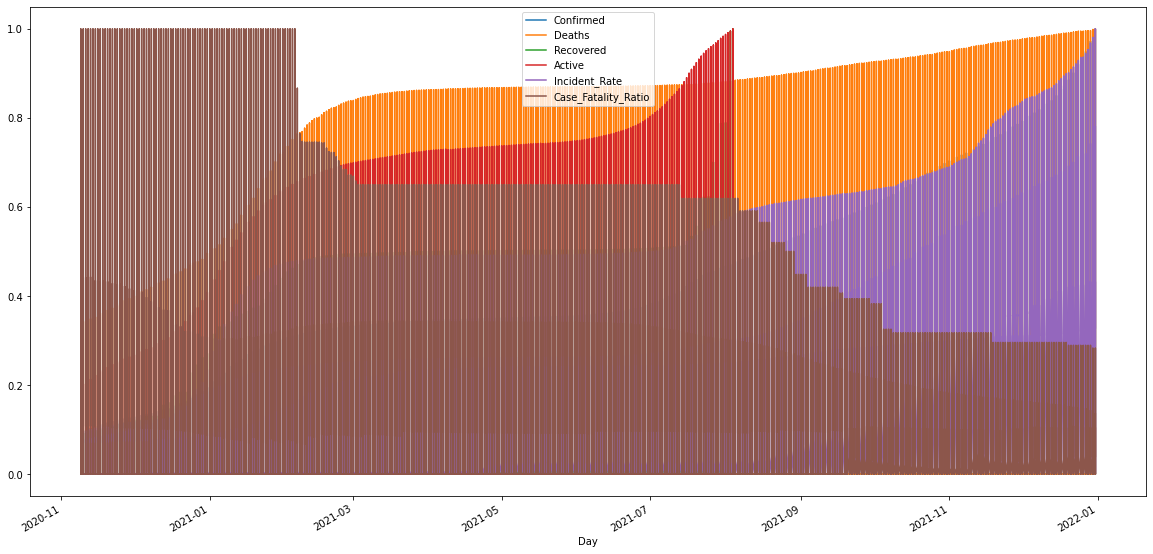

In [10]:
df_uk_scaled[selected_columns].plot(figsize=(20,10))
plt.savefig('output/uk_scoring_report.png')

In [11]:
df_uk_scaled.to_csv('output/uk_scoring_report.csv')
df_uk_notscaled.to_csv('output/uk_scoring_report_NotScaled.csv')

In [12]:
host="ibrahim_hw2_postgres" # use "localhost" if you access from outside the localnet docker-compose env 
database="deproject"
user="postgres"
password="password123"
port='5432'
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
print(engine.table_names())


df_uk_scaled.to_sql('uk_scoring_report', engine,if_exists='replace',index=False)

/tmp/ipykernel_901/1330920181.py:7: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


[]


524